# Проект приоритизация гипотез, анализ результатов A/B-теста.

***Крупный интернет-магазин поставил цель повысить выручку. Выдвинуто 9 гипотез для достижения цели.***


### Часть 1. Приоритизация гипотез.
    - Провести анализ списка гипотез для увеличения выручки интернет-магазина.
    - Приоритизировать гипотезы 

### Часть 2. Анализ A/B-теста
    - Провести анализ проведенного A/B-теста.


##### Описание исходных данных
###### Файл hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
###### Файл orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
###### Файл visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### Приоритизация гипотез.
- Применим фреймворк ICE для приоритизации гипотез.
- Применим фреймворк RICE для приоритизации гипотез. 
- Спавним результаты и предложим приоритетные гипотезы.

#### Анализ A/B-теста
- Исследуем кумулятивную выручку по группам.
- Исследуем кумулятивный средний чек по группам.
- Исследуем кумулятивное среднее количества заказов на посетителя по группам (конверсию).
- Исследуем количество заказов по пользователям. 
- Исследуем стоимость заказов.
- По «сырым» данным посчитаем:
    - статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами.
    - статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- По «очищенным» данным посчитаем:
    - статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами.
    - статистическую значимость различий в среднем чеке заказа между группами.
- Выводи и решение по результатам А/В теста


### Импорт библиотек и файлов

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    hypothesis = pd.read_csv('C://Users//эйч пи//Desktop//Учеба//Аналитик данных//jupyter notebook//hipothesis//hypothesis.csv')
    visitors = pd.read_csv('C://Users//эйч пи//Desktop//Учеба//Аналитик данных//jupyter notebook//hipothesis//visitors.csv')
    orders = pd.read_csv('C://Users//эйч пи//Desktop//Учеба//Аналитик данных//jupyter notebook//hipothesis//orders.csv')
except:     
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')

## Часть 1: Приоритизация гипотез

In [3]:
pd.options.display.max_colwidth=400 # таблица небольшая не имеет смысла исследовать на пропуски и дубликаты
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower() # приведем названия к общепринятому формату

### Применим фреймворк ICE

In [5]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] /hypothesis['efforts']
hypothesis_ice = hypothesis[['hypothesis', 'ICE']]
hypothesis_ice.sort_values(by='ICE', ascending=False).round(3)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


### Примение фреймворка RICE

In [6]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] /hypothesis['efforts']
hypothesis_rice = hypothesis[['hypothesis', 'RICE']]
hypothesis_rice.sort_values(by='RICE', ascending=False).round(3)


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
hypothesis_ice.join(hypothesis_rice.set_index('hypothesis'), on='hypothesis').\
    sort_values(by='ICE', ascending=False).round(3)

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000,3.0


### Выводы по гипотезам
##### Наибольший приортиет по ICE имеют гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

##### Наибольший приортиет по RICE имеют гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

#### Причины различия приоритетов:
- Фреймворк RICE учитывает охват пользователей - параметр 'Reach', поэтому при  его рачете лидер фреймворка ICE - гипотеза 8 "Скидка в день рождения" - ушла на 5 место. Охват данной акцие ограничен только клиентами с днем рождения, хоть ее влияние на охваченных и велико.
- Первая пятерка гипотез совпадает у ICE и RICE, но в разной последовательности. 
- Гипотеза 0 "Добавить 2 новых канала" в лидерах а обоих фреймворках - ICE (2) и RICE (3).
- Гипотеза 7 "Добавить форму подписки" так же в лидерах - ICE (3) и RICE (1). Высокий охват, высокое влияние и средняя сложность проверки.

#### Рекомендации по приоритету:
###### 1. Гипотеза 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
###### 2. Гипотеза 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
###### 3. Гипотеза 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Эти действия с большей вероятностью помогут увеличить конверсию (гип. 6), привлечь новых покупателей (гип. 0) и повысить лояльность клиентов и частоту покупок (гип.7) 


## Анализ А/В теста

### Исследование и обработка данных DataFrame

In [8]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
774,2049400530,2429822128,2019-08-05,2550,A
480,1954636284,2600415354,2019-08-06,1530,B
788,2430984474,2467439671,2019-08-07,3888,B
261,1284843140,3386452937,2019-08-02,8240,A
207,1780029109,2785527055,2019-08-02,4717,B


In [9]:
visitors.sample(5)

,date,group,visitors
51,2019-08-21,B,656
11,2019-08-12,A,595
29,2019-08-30,A,490
58,2019-08-28,B,654
61,2019-08-31,B,718


In [10]:
def description(x, y): #соберем в 1 функцию основные статистики по ДатаФреймам
    display('Общая информация orders')
    display(x.info())
    display('Статистические показатели orders')
    display(x.describe())
    print('Наличие дубликатов orders:', x.duplicated().sum())
    display('Общая информация visitors')
    display(y.info())
    display('Статистические показатели visitors')
    display(y.describe())
    print('Наличие дубликатов visitors:', y.duplicated().sum())

In [11]:
description(orders, visitors)

'Общая информация orders'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'Статистические показатели orders'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Наличие дубликатов orders: 0


'Общая информация visitors'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Статистические показатели visitors'

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Наличие дубликатов visitors: 0


In [12]:
# Преобразуем date в формат даты из object в datetime
def to_date(x):
    x['date'] = pd.to_datetime(x['date'])

to_date(orders)
to_date(visitors)

In [13]:
def dates(x):
    display(x.date.min())
    display(x.date.max())

In [14]:
dates(orders)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [15]:
dates(visitors)

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [16]:
orders.groupby('group').agg({'transactionId' : 'count'}) # количество заказов в группах

,transactionId
group,
A,557
B,640


In [17]:
orders.groupby('group').agg({'visitorId' : 'nunique'}) # количество пользователей в группах

,visitorId
group,
A,503
B,586


In [18]:
# Есть ли пользователи, попавшие в обе группы:
unique_visitors = orders.loc[:, ['visitorId', 'group']].drop_duplicates().drop(columns=['group'])
unique_visitors.visitorId.duplicated().sum()

58

##### Итого данные:
- Формат дат преобразован в "datetime64".
- В таблице orders:
    - минимальная выручка заказа составил 50 уе, 
    - максимальная - 1 294 500 уе. 
    - cредняя выручка - 8 348,01 уе, 
    - медиана - 2 978 уе
- В таблице visitors:
    - количество пользователей за день в группе A/B-теста варьировалось от 361 до 770.
    - cреднее число - 607,29, 
    - медиана - 624,5.
- Минимальная и максимальная дата в двух таблицах совпадает - 1 августа 2019 г. и 31 августа 2019 г. соответственно.
- Дубликаты в таблицах не выявлены.
- Общее количество заказов в группах не совпадает:
    - в группе А зафиксировано 557 заказов, 
    - в группе В - 640. 
- Сравнение уникальных пользователей также выявило различия. В группе В на 83 уникальных пользователя больше. 
- В группе А и группе В оказалось 58 пользователей одновременно. 

Количество пользователей в различных группах не должно превышать 1% для успешного проведения теста. Некорректное деление трафика теста влияет на качество анализа.

### Построим график кумулятивной выручки по группам.

In [19]:
# создание датафрейма datesGroups с уникальными парами значений 'date' и 'group', таблицы orders; удаление дубликатов
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg({ 'date': 'max', # дата
            'group': 'max', # группа A/B-теста
            'transactionId': 'nunique', # число уникальных заказов в группе теста по указанную дату включительно
            'visitorId': 'nunique', # число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста
            'revenue': 'sum', # суммарная выручка заказов в группе теста по указанную дату включительно
        }),
    axis=1,).sort_values(by=['date', 'group']) # сортировка по столбцам 'date', 'group'

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,).sort_values(by=['date', 'group'])

# определение переменной по колонкам 'date', 'group' методом merge()
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# присвоение столбцам cumulativeData названия
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


# переменная с данными о датах, выручке и числе заказов в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders','buyers','visitors']
]

# переменная с данными о датах, выручке и числе заказов в группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders','buyers','visitors']
]

In [20]:
cumulativeData.head(2)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713


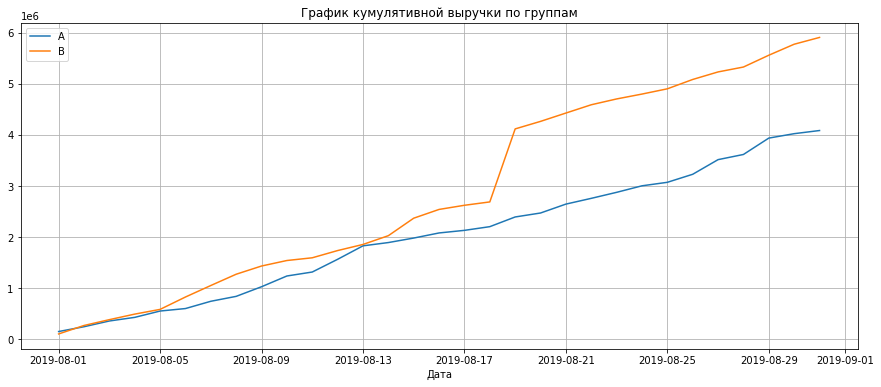

In [21]:
# график кумулятивной выручки по группам
plt.figure(figsize=(15,6))
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', labelsize=10)
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.legend();

#### выводы по кумулятивной выручке:
- Выручка растет на протяжении всего теста в обеих группах.
- Группа В с минимальным отрывом опрежает практически весь тестовый период группу А, в начале теста была на одном уровне с группой А. 
- 18-19 августа выручка у сегмента В резко выросла, возможно рост количества заказов или выброс по стоимости заказа. Выручка сегмента А росла практически равномерно весь месяц.

### Построим график кумулятивного среднего чека по группам. 

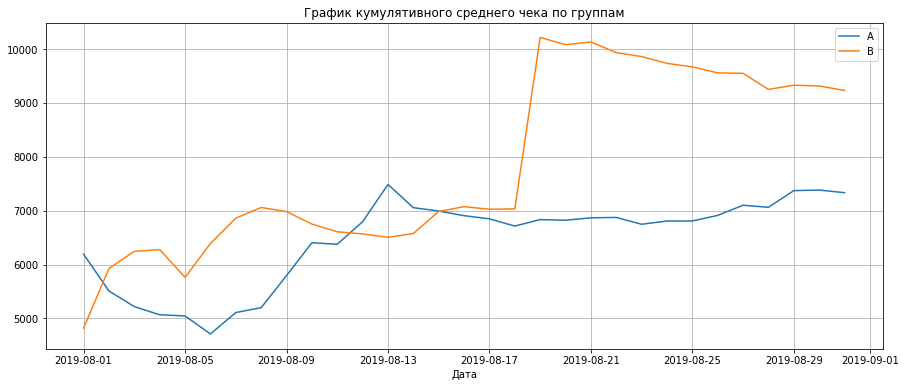

In [22]:
plt.figure(figsize=(15,6))
# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', labelsize=10)
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.legend();

#### выводы по кумулятивному среднему чеку:
- кумулятивное значение среднего чека растет по обеим группам до середины месяца
- затем по группе А снижение и вновь незначительный рост.
- в группе А к концу месяца средний чек почти сравнялся с максимальным значением, достигнутым 13 августа. 
- 18 - 19 августа у группы В выявлен аномальный рост кумулятивного среднего чека.
- после аномального скачка средний чек группы В снижается, но незначительно.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

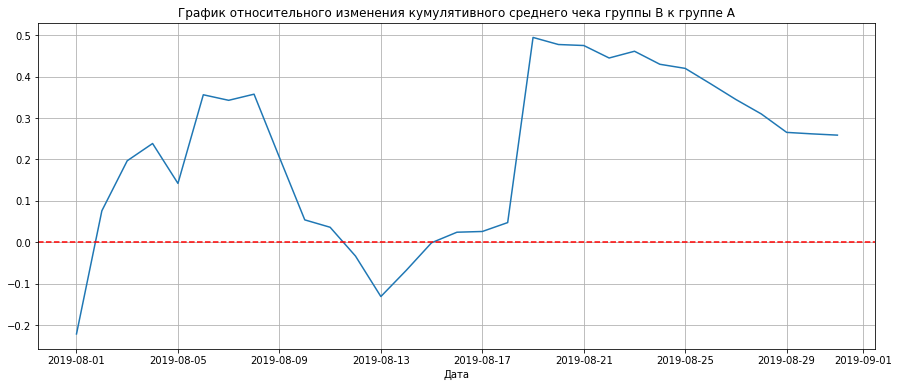

In [23]:
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])
plt.figure(figsize=(15,6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--');

# размер шрифта по оси x
plt.tick_params(axis='x', labelsize=10)
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата');

#### выводы по относительному изменению кумулятивного среднего чека
- Результаты значительно и резко менялись в несколько дат: 6,11,13,19
- Вероятно в эти дни были совершениы аномальные по сумме заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

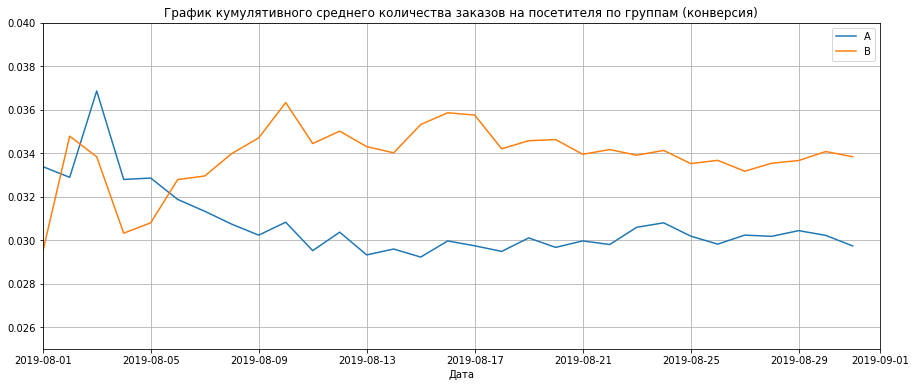

In [24]:
# считаем кумулятивное среднее количество заказаов на посетителя (кумулятивную конверсию)
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', labelsize=10)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам (конверсия)')
plt.xlabel('Дата');

#### выводы по относительному кумулятивному среднему количеству заказов
- Кумулятивная конверсия группы В выше А с 6 августа.
- Среднее количество заказов в группе В растет до 10 августа, с небольшим провалом 4 августа.
- В середины месяца конверсия стабилизировлсь с небольшим снижением.
- Среднее количество заказов в группе А резко падает с 3 до 9 августа. после этого выравнивается с тенденцией на небольшое снижение.
- Снижение к концу месяца в обеих группах можно объяснить сезонностью.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

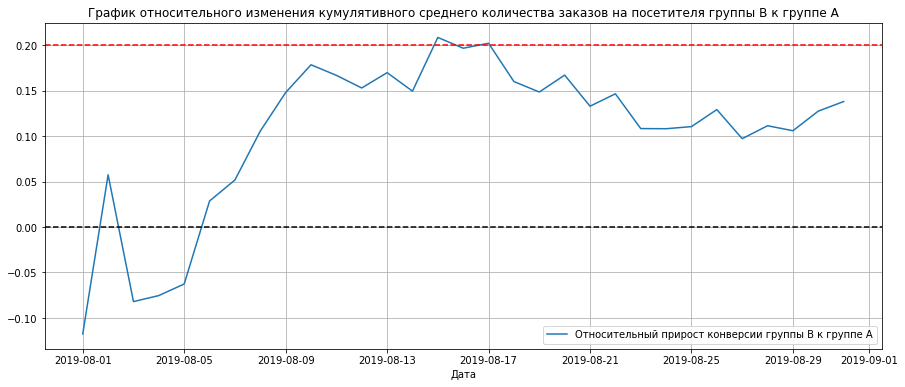

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='red', linestyle='--')

# размер шрифта по оси x
plt.tick_params(axis='x', labelsize=10)
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.show()

##### выводы по относительному изменению кумулятивного среднего количества заказов на посетителя группы B к группе A
- Группа В до 6.08 проигрывала группе А
- С 8.08 прирост колебался от 10 до 20%, постепенно снижаясь к концу месяца.
- 20% опережение было достигнуто в период с 16.08 по 18.08
- Среднее превышение около 13%.

### Построим точечный график количества заказов по пользователям.

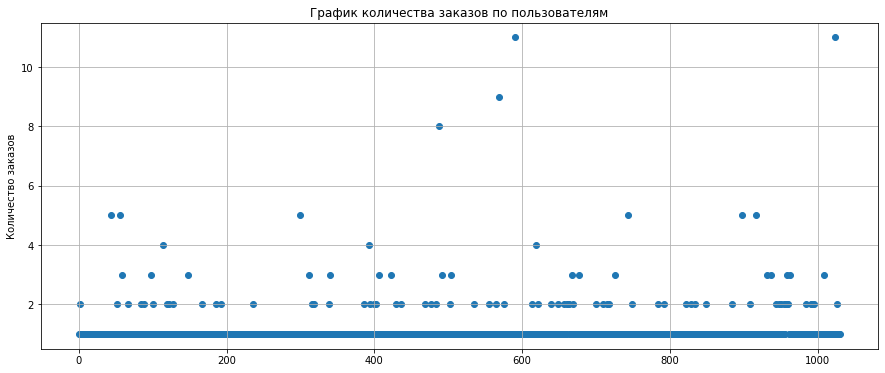

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']
plt.figure(figsize=(15,6))

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);
plt.grid()
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов');

In [27]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


#### выводы по графику количества заказов по пользователям.
- Пользователей, которые сделали более двух заказов незначительное количество. 
- Есть относительно большое количество пользователей, которые сделали два заказа. 
- Необходимо посчитать выборочные перцентили.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [28]:
print('Перцентиль 95: %.0f' % (np.percentile(ordersByUsers['orders'], [95])))
print('Перцентиль 99: %.0f' % (np.percentile(ordersByUsers['orders'], [99])))

Перцентиль 95: 2
Перцентиль 99: 4


- Не более 5% пользователей совершали больше двух заказов. 
- Не более 1% пользователей - больше 4 заказов. 
- ***Целесообразно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.***

### Построим точечный график стоимостей заказов

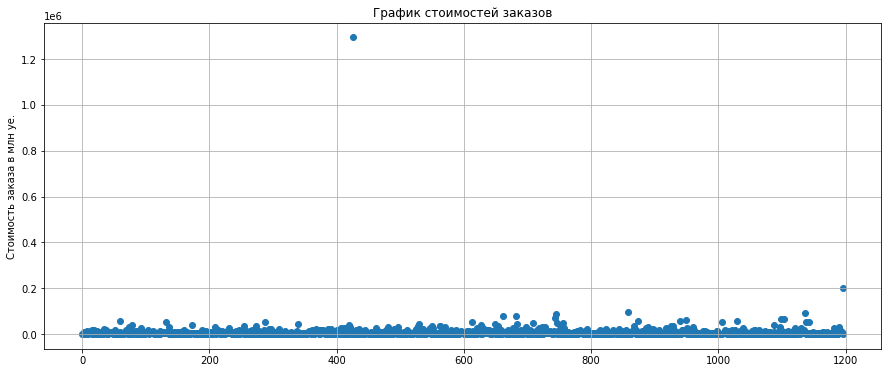

In [29]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,6))
plt.scatter(x_values, orders['revenue']);
plt.grid()
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа в млн уе.');

In [30]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


##### выводы по графику стоимости заказов:
- Выброс - заказ на сумму 1 294 500 уе. Данный заказ является крайне аномальным. 
- Второй выброс 202 740 уе.
- Все остальные заказы ниже 93 940 уе. 
- Необходимо посчитать выборочные перцентили 

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [31]:
print('Перцентиль 95: %.0f' % (np.percentile(orders['revenue'], [95])))
print('Перцентиль 99: %.0f' % (np.percentile(orders['revenue'], [99])))

Перцентиль 95: 28000
Перцентиль 99: 58233


- Не более 5% заказов стоимостью выше 28 000 уе. 
- Не более 1% заказов - больше 58233 уе. 
- ***Целесообразно выбрать границей стоимости заказа 28 000 уе.***

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

***Н0: различий в конверсии между группами нет.***

***Н1: различия в конверсии между группами есть.***

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Среденее кол-во заказов В к А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01679
Среденее кол-во заказов В к А: 0.138


- ***p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.***
- ***Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.***

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [33]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Средний чек "сырой" В к А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

p-value: 0.729
Средний чек "сырой" В к А: 0.259


- ***P-value гораздо больше 0,05 - статистически значимых отличий в среднем чеке между группами нет.***
- ***Относительное различие среднего чека между группами 25,9% не является стат. значимым на "сырых" данных. Проверим на "очищенных".***

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным.

***Н0: различий в конверсии между группами нет.***

***Н1: различия в конверсии между группами есть.***

In [34]:
# создадим срезы - по количеству заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# - по стоимости закза 
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Среденее кол-во заказов В к А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.01304
Среденее кол-во заказов В к А: 0.173


- p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем.
- За аномальных пользователей были приняты пользователи с 3 заказами и более, или совершил заказ на сумму более 28 000 уе. 
- Конверсия группы В лучше на 17,3% выше группы А. Показатель лучше, чем до "очистки" данных (13,8%).
- ***Статистическая значимость достигнута.***

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

***Нулевая гипотеза: различий в среднем чеке между группами нет.***

***Альтернативная гипотеза: различия в среднем чеке между группами есть.***

In [36]:
print( 'p-value', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Средний чек "очищенный" В к А:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value 0.738
Средний чек "очищенный" В к А: -0.020


- р-value оказался примерно на том же уровне - 0,738 (0,729 по "сырым" данным). Нулевую гипотезу не отвергаем. 
- Средний чек у группы В снизился значительно - группа А превосходит В незначительно на 2%. 
- После "очистки" данных - удаления выбросов по сумме заказа - разница в среднем чеке между двумя группами сократилась до минимума. Вероятно аномальные заказы попали на группу В.
- такое различие не является статистически значимым.


## Вывод

#### Тест успешен и его можно завершить.
- ***тест успешен по росту конверси. По среднему чеку остался на том же уровне.***
- ***При росте коверсии и сохранении среднего чека выручка вырастет, что и является целью.***
- Выявлено статистически значимое различие конверсии между группами В и А по «сырым» данным и данным после "очистки" от аномалий.
- Статистически значимых различий по среднему чеку не были зафиксированы в "очищенных" данных.


#### Зафиксирована победа группы В, результаты по конверсии которой оказались лучше группы А на 13,8% и 17,3% до и после "очистки" данных соответственно:
- Кумулятивная выручки группы В превосходит А
- График кумулятивного среднего количества заказов на посетителя по группам показал: результаты группы B лучше группы A. Они зафиксировались на отметке 0,34 и 0,31 соответственно.
- Различия среднего чека на графике сильно колеблются по "сырым" данным - аномальные покупки.
